# Exercise 02.a: Scale-selective damping

**Due:** _25 November 2020_

**Names:** David, Lukas, Mariana, Linus (for now:D)  (Up to 3 people can submit together.)

Consider the harmonic and biharmonic diffusion equations

$$
  \frac{\partial u}{\partial t} = A_2 \frac{\partial^2 u}{\partial x^2} \quad\text{(harmonic)}
  \qquad\qquad
  \frac{\partial u}{\partial t} = -A_4 \frac{\partial^4 u}{\partial x^4} \quad\text{(biharmonic)}
$$

where $A_2$ and $A_4$ are the positive definite harmonic and biharmonic diffusion coefficients,
respectively.

1. Discretize the harmonic equation in the x direction. Derive the damping time scale as a function of wave number.

1. Discretize the biharmonic equation in the x direction. Derive the damping time scale as a function of wave number.

1. Plot both damping time scales as a function of wave number. How do they differ for long and short waves and why?

1. Derive the damping time scale as a function of wave number for the analytic solution of both equations and compare them to the time scales implied by the finite difference equations.

1. Show that in the limit $\Delta x \rightarrow 0$, the damping time scales of the discretized and of the analytical solution are the same.

**Hint:** Since the analytical solution of both diffusion equations has the form

$$u(x, t) = \hat{u}(t) {\rm e}^{ikx}$$

where $\hat{u}$ is independent of $x$, $i=\sqrt{-1}$ and $k$ is the wave number.
After discretizing the equations in the x direction, one can substitute $u(j\Delta x, t)$
into the discrete equation to get the damping coefficient as a function of wave number $k$.

## 1.)
To discretize the harmonic equation in space, we make use of the derivation of the discrete second order derivative in the script. (eq. 1.12)
With this, the harmonic equation takes the form

$$
\frac{\partial}{\partial t} u_{i} = A_{2}\frac{\partial^{2} u_{i}}{\partial x^{2}} = A_{2}\frac{u_{i+1}-2 u_{i}+u_{i-1}}{\Delta x^2}
$$

Substituting the analytical solution for each gridpoint 

$$
u_{j}(x,t) = \hat{u}(t) e^{i k (j \Delta x)}
$$

as given in the hint, yields

\begin{align}
\frac{\partial}{\partial t} \hat{u}(t) e^{i k j \Delta x} &= \hat{u}(t)\frac{A_{2}}{\Delta x^2}\left( e^{i k (j+1) \Delta x}-2  e^{i k j \Delta x} +  e^{i k (j-1) \Delta x} \right) \notag \\
&= \frac{A_{2}}{\Delta x^2}\left( e^{i k j \Delta x} e^{i k \Delta x}-2  e^{i k j \Delta x} +  e^{i k j \Delta x} e^{i k \Delta x} \right)\hat{u}(t).
\end{align}

Deviding by $e^{i k j \Delta x}$ then leaves

$$
\frac{\partial}{\partial t} \hat{u}(t) = \frac{A_{2}}{\Delta x^2} \left( e^{i k  \Delta x} + e^{- i k \Delta x} -2 \right) \hat{u}(t) 
$$

Using $ e^{i k  \Delta x} + e^{- i k \Delta x} = 2 \cos(k \Delta x)$ simplifies above to 

$$
\frac{\partial}{\partial t} \hat{u}(t) = \frac{2 A_{2}}{\Delta x^2} \left( \cos(k \Delta x) -1 \right) \hat{u}(t).
$$

While this simple ODE is well understood, the solution for $\hat{u}(t)$ is of form

$$
\hat{u}(t) \propto e^{\frac{2 A_{2}}{\Delta x^2} \left( \cos(k \Delta x) -1 \right) t},
$$

where the damping time scale can be identified as the negative inverse of the exponent (since $\hat{u}(t)\propto e^{-\frac{t}{\tau}}$):

$$
\tau_{h} = \frac{\Delta x^2}{ 2 A_{2}\left(1- \cos(k \Delta x) \right)}
$$

## 2.)

To discretizing the biharmonic equation in space, we make use of the derivation of the discrete forth order derivative. With this, the biharmonic equation takes the form:

$$
\frac{\partial}{\partial t} u_{i} = - A_{4}\frac{\partial^{4} u_{i}}{\partial x^{4}} = - 12 A_{4}\left(\frac{u_{i+1}-2 u_{i}+u_{i-1}}{\Delta x^4} - \frac{1}{\Delta x^4} \frac{u_{i+1}-2 u_{i}+u_{i-1}}{\Delta x^2}\right)
$$

Substituting the analytical solution for each gridpoint using the given hint, yields:

\begin{align}
\frac{\partial}{\partial t} \hat{u}(t) e^{i k j \Delta x} &= - 12 A_{4} \left( \frac{e^{i k (j+1) \Delta x}-2  e^{i k j \Delta x} +  e^{i k (j-1) \Delta x}}{\Delta x^4} - \frac{1}{\Delta x^4} \frac{e^{i k (j+1) \Delta x}-2  e^{i k j \Delta x} +  e^{i k (j-1) \Delta x}}{\Delta x^2} \right) \hat{u}(t) \notag \\
&= - 12 A_{4}\left( \left( e^{i k \Delta x}-2 +  e^{- i k \Delta x}\right) \left( \frac{1}{\Delta x^{4}}-\frac{1}{\Delta x^{6}} \right) \right) \hat{u}(t)
\end{align}

Using $ e^{i k  \Delta x} + e^{- i k \Delta x} = 2 \cos(k \Delta x)$ and rearrenging the equation simplifies above to 

$$
\frac{\partial}{\partial t} \hat{u}(t) = -\frac{24 A_{4}}{\Delta x^4} \left\{ \left[ \cos(k \Delta x) -1 \right] \left[ 1 - \frac{1}{\Delta x^2} \right] \right\}\hat{u}(t)
$$

The solution for $\hat{u}(t)$ is of the same form as the previous case, therefore the damping time scale is given by:

$$
\tau_{b} = \frac{\Delta x^4 + \Delta x^6}{24 A_{4} \left( 1- \cos(k \Delta x)  \right) }
$$

Since we already neglected terms of order $O(\Delta x^4)$ in the derivation of the fourth order derivative, the sixth power term can be neglected as well, yielding

$$
\tau_{b} = \frac{\Delta x^4}{24 A_{4} \left( 1- \cos(k \Delta x)  \right) }
$$

## 3.)


In [126]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [127]:
#Initializing diffusion object, grid and diffusion parameters are set to default values
D = Diffusion()
D.display()

N:       21
L:       10
A_2:     1.0
A_4:     1.0
dx:      0.5
x:       [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


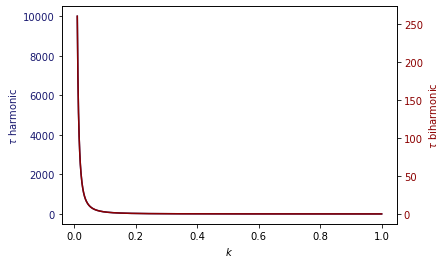

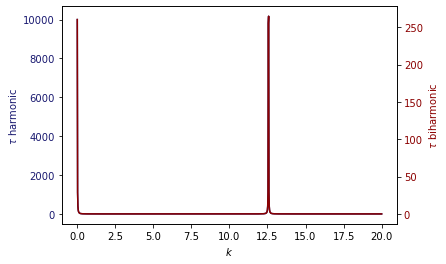

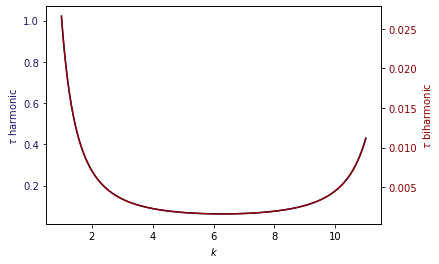

In [128]:
D.k = np.linspace(0.01,1,1000)
D.tau_plot(D.tau_h_dis(),D.tau_b_dis())

D.k = np.linspace(0.01,20,1000)
D.tau_plot(D.tau_h_dis(),D.tau_b_dis())

D.k = np.linspace(1,11,1000)
D.tau_plot(D.tau_h_dis(),D.tau_b_dis())

As visible above, both damping time scales show the same functional dependency $\tau(k)$ with a constant shift in the y-axis. This shift can be identified directly by comparing the results in 1.) and 2.) as 

$$
\tau_{b} = \frac{\Delta x^2 A_{2}}{12 A_{4}} \tau_{h}
$$

In [129]:
#check value:
print((D.dx**2 * D.A_2)/(12 * D.A_4))

D.k = 1.

print(D.tau_b_dis()/D.tau_h_dis())

0.020833333333333332
0.026041666666666668


The differences between the two given values can be explained by the neglected $\Delta x^6$ term for $\tau_{b}$. (In our case, $\Delta x = 0.5$ is rather big)

Also note, that the damping time scales diverge periodically with $k=n\frac{2 \pi}{\Delta x}$ with $n = 0,1,2... $. Within this periodicity, the damping timescales are decreasing with decreasing wavelength. Shorter waves are thus damped much faster than longer waves for both equations, with the biharmonic equation damping overall faster than the harmonic equation. 

## 4.)
To derive the damping time scales for the analytical solution, we substitute the solution as given in the hint into the harmonic equation.

\begin{align}
\frac{\partial u}{\partial t} &= A_{2}\frac{\partial^2 u}{\partial x^2}  \\
e^{i k x} \frac{\partial \hat{u}}{\partial t} &= A_{2} \hat{u} \frac{\partial^2 }{\partial x^2} e^{i k x} \\
e^{i k x} \frac{\partial \hat{u}}{\partial t} &= -A_{2} \hat{u} k^2 e^{i k x} \\
\frac{\partial \hat{u}}{\partial t} &= -A_{2} k^2 \hat{u}
\end{align}

As before, the harmonic damping time scale can be identified

$$
\tau_{h} = \frac{1}{k^2 A_2}
$$

The biharmonic damping coefficient can be derived analogously as 

$$
\tau_{b} = \frac{1}{k^4 A_{4}}
$$

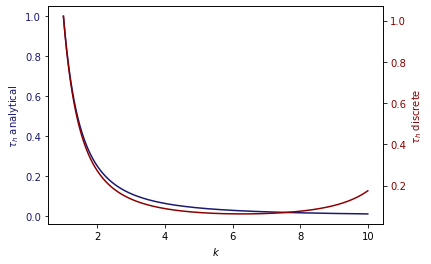

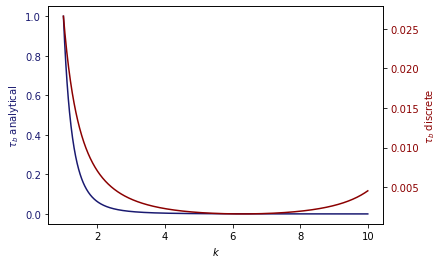

In [130]:
D.k = np.linspace(1,10,1000)
D.tau_plot(D.tau_h_ana(),D.tau_h_dis(),ylabel=(r'$\tau_{h}$ analytical',r'$\tau_{h}$ discrete'))

D.tau_plot(D.tau_b_ana(),D.tau_b_dis(),ylabel=(r'$\tau_{b}$ analytical',r'$\tau_{b}$ discrete'))

The discrete solutions show smaller damping time scales for both equations, with a way stronger difference for the biharmonic case (Mind the scales!). However, the analytic solutions do not show any periodicity. Therefore the discrete solution can still have larger damping time scales for very short waves.  

## 5.)
In the limit of $\Delta x \rightarrow 0$, the denominator and numerator get zero for both, harmonic and biharmonic damping time scale. Therefore, L'Hôpitals rule needs to be considered.

$$
\lim_{\Delta x \rightarrow 0} \frac{f(\Delta x)}{g(\Delta x)} = \lim_{\Delta x \rightarrow 0} \frac{f'(\Delta x)}{g'(\Delta x)}
$$

Applying this twice for the harmonic and four times for the biharmonic then yields:

\begin{align}
\lim_{\Delta x \rightarrow 0} \frac{\Delta x^2}{ 2 A_{2}\left(1- \cos(k \Delta x) \right)} &= \lim_{\Delta x \rightarrow 0} \frac{2}{ 2 A_{2} k^2 \cos(k \Delta x)} &&= \frac{1}{A_{2} k^2} \\
\lim_{\Delta x \rightarrow 0} \frac{\Delta x^4 + \Delta x^6}{ 24 A_{4}\left(1- \cos(k \Delta x) \right)} &= \lim_{\Delta x \rightarrow 0} \frac{24-\Delta x^2}{ 24 A_{4} k^4 \cos(k \Delta x)} &&= \frac{1}{A_{4} k^4}
\end{align}

In [131]:
class Diffusion:
    def __init__(self, params=None):
        if params is None:
            params  = {'N': 21, 'L': 10, 'A_2': 1., 'A_4': 1., 'k_lim':(0.01,1.)}
            
        self.N     = params['N']
        self.L     = params['L']
        self.A_2   = params['A_2']
        self.A_4   = params['A_4'] 
        self.k_lim = params['k_lim']
        self.update_params()

        
    def A_harmonic(self):
        #harmonic matrix:
        A = np.zeros((self.N-2, self.N-2))
        indices = np.arange(self.N -2)

        # set diagonal
        A[indices, indices] = -2 / self.dx ** 2

        # set off-diagonal
        A[indices[:-1], indices[:-1] + 1] = 1 / self.dx ** 2
        A[indices[:-1] + 1, indices[:-1]] = 1 / self.dx ** 2
        return A
    
    def A_biharmonic(self):
        #harmonic matrix:
        A = self.A_h * self.A_h
        return A
    
    def display(self):
        print('N:      ', self.N)
        print('L:      ', self.L)
        print('A_2:    ', self.A_2)
        print('A_4:    ', self.A_4)
        print('dx:     ', self.dx)
        print('x:      ', self.x)
        
    def tau_h_dis(self):
        return(self.dx**2 / (2*self.A_2*(1-np.cos(self.k*self.dx))))
    
    def tau_b_dis(self):
        return((self.dx**4 + self.dx**6)/(24*self.A_4*(1-np.cos(self.k*self.dx))))
    
    def tau_h_ana(self):
        return(1/(self.A_2*self.k**2))
    
    def tau_b_ana(self):
        return(1/(self.A_4*self.k**4))
    
    def update_params(self):
        self.dx    = self.L / (self.N -1)
        self.x     = self.dx*np.arange(self.N)
        self.A_h   = self.A_harmonic()
        self.A_b   = self.A_biharmonic()
        self.k   = np.linspace(self.k_lim[0],self.k_lim[1],1000)
        
    def tau_plot(self, tau_h, tau_b, ylabel=(r'$\tau$ harmonic',r'$\tau$ biharmonic')):
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(self.k,tau_h,color='midnightblue',label='harmonic')
        ax2.plot(self.k,tau_b,color='darkred',label='biharmonic')
        ax1.set_ylabel(ylabel[0],color='midnightblue')
        ax2.set_ylabel(ylabel[1],color='darkred')
        ax1.set_xlabel(r'$k$')
        ax1.tick_params(axis='y', labelcolor='midnightblue')
        ax2.tick_params(axis='y', labelcolor='darkred')
        plt.show()